In [2]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv("data/car.data")


balancedDF = pd.DataFrame()

vgoodData = df[df.iloc[:,-1].str[:] == 'vgood']
maxRows = len(vgoodData.values)

goodData = df[df.iloc[:,-1].str[:] == 'good']
accData = df[df.iloc[:,-1].str[:] == 'acc']
unaccData = df[df.iloc[:,-1].str[:] == 'unacc']

balancedDF = balancedDF.append(vgoodData)
balancedDF = balancedDF.append(goodData.head(maxRows))
balancedDF = balancedDF.append(accData.head(maxRows))
balancedDF = balancedDF.append(unaccData.head(maxRows))

print(balancedDF)

      vhigh vhigh.1  2   2.1  small   low  unacc
1096    med     med  2     4    big  high  vgood
1105    med     med  2  more    big  high  vgood
1123    med     med  3     4    big  high  vgood
1129    med     med  3  more    med  high  vgood
1132    med     med  3  more    big  high  vgood
...     ...     ... ..   ...    ...   ...    ...
60    vhigh   vhigh  4     2    big   med  unacc
61    vhigh   vhigh  4     2    big  high  unacc
62    vhigh   vhigh  4     4  small   low  unacc
63    vhigh   vhigh  4     4  small   med  unacc
64    vhigh   vhigh  4     4  small  high  unacc

[260 rows x 7 columns]


In [3]:
data = pd.DataFrame()
balanced_data = pd.DataFrame()
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "classify"]
for index, col in enumerate(columns):
    if col != "classify":
        data = pd.concat([data, pd.get_dummies(df.iloc[:,index], prefix=col)], axis=1)
        balanced_data = pd.concat([balanced_data, pd.get_dummies(balancedDF.iloc[:,index], prefix=col)], axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder

X = data.values
X_balanced = balanced_data.values
print("X:")
print(X)
print()

y_nominal = df.iloc[:,-1].values
y_nominal_balanced = balancedDF.iloc[:,-1].values

y = pd.get_dummies(y_nominal, prefix="classify")
y_balanced = pd.get_dummies(y_nominal_balanced, prefix="classify")
# print(y)
# print(y_balance)

y = y.values
y_balanced = y_balanced.values

LE = LabelEncoder()
y_balanced_label_encoded = LE.fit_transform(y_nominal_balanced)

print("Y:")
print(y)

X:
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]]

Y:
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


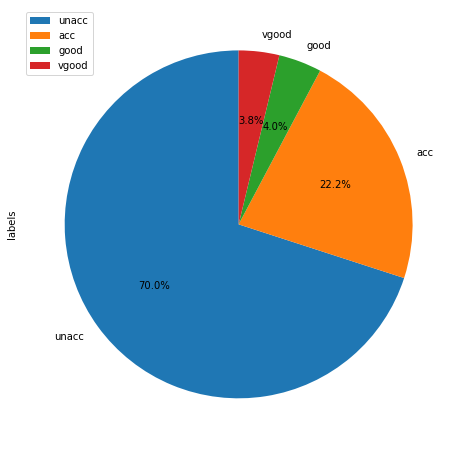

In [5]:
# Categorize label
        
labelDF = pd.DataFrame({'labels': [len(unaccData.values), len(accData.values), len(goodData.values), len(vgoodData.values)]}, index=['unacc', 'acc', 'good', 'vgood'])
plot = labelDF.plot.pie(y='labels', startangle=90, autopct='%1.1f%%', figsize=(8,8))


In [32]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, train_size=0.5, random_state=4)
# X_balanced_train, X_balanced_test, y_balanced_train, y_balaced_test = model_selection.train_test_split(X_balanced, y_balanced, test_size=0.5, train_size=0.5, random_state=4)

X_balanced_train, X_balanced_test, y_balanced_train, y_balaced_test = model_selection.train_test_split(X_balanced, y_balanced_label_encoded, test_size=0.5, train_size=0.5, random_state=4)

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

accuracy_list = []
for num_neighbor in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=num_neighbor, weights='distance', metric='euclidean')
    knn.fit(X_train,y_train)

    y_predict = knn.predict(X_test)

    #Tinh do chinh xac
    acc_score = metrics.accuracy_score(y_predict,y_test)
    accuracy_list.append(acc_score)

max_acc = accuracy_list[0]
max_index = 0
for index in range(0, len(accuracy_list)):
    if accuracy_list[index] > max_acc:
        max_acc = accuracy_list[index]
        max_index = index + 1

print("K toi uu nhat:", max_index)
print("Accuracy:", max_acc)

K toi uu nhat: 5
Accuracy: 0.8657407407407407


In [35]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf', gamma=0.01, C=100.)
svm_classifier.fit(X_balanced_train, y_balanced_train)

y_pred_svm = svm_classifier.predict(X_balanced_test)
print('predict:\n', y_pred_svm)
print('y_true:\n', y_balaced_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_balaced_test)
print('acurracy:\n', acc_score_svm)

predict:
 [2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 1 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 3 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 1 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
y_true:
 [2 3 2 2 0 3 1 3 2 1 3 2 3 2 2 1 1 0 0 0 2 1 0 1 0 0 3 0 2 2 2 1 0 2 1 0 1
 3 3 0 1 3 3 2 2 3 3 1 3 3 1 2 0 1 3 2 1 0 3 2 2 2 1 1 0 2 1 3 1 1 2 0 2 1
 3 3 1 2 2 1 2 1 3 1 0 2 0 0 1 1 0 3 1 1 2 1 3 3 3 2 1 3 3 2 2 3 2 1 3 2 3
 3 0 3 0 1 1 1 0 2 0 2 0 0 1 2 3 2 3 3]
acurracy:
 0.9923076923076923
